<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/cnn_tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# টেন্সরবোর্ড, মডেলকে আরো ভালো করার ভিজ্যুয়ালাইজেশন টুুুুল 


মেশিন লার্নিং এর একদম শুরুর মডেলটা তৈরি করার সোজা। তবে সেখান থেকে আরও বেশি অ্যাকুরেসি পেতে গেলে মডেলকে ঠিকমতো মাপতে পারাটা জরুরি। এর অর্থ হচ্ছে আপনি তখনই একটা মডেলকে আরও উন্নত করতে পারবেন যখন সেটাকে মাপতে পারবেন শুরু থেকে। কোন কোন প্যারামিটারে মডেল উন্নত হচ্ছে আর কোনটায় হচ্ছে না সেটার জন্য যে যতো ধরণের টেস্ট এবং ট্রায়াল করতে হয়, সেটা অনেক ঝামেলার। 

সে কারণেই টেন্সর-ফ্লো এর সাথে যুক্ত হয়েছে টেন্সরবোর্ড। টেন্সরবোর্ডের কাজ হচ্ছে মেশিন লার্নিং ওয়ার্ক-ফ্লো এর শুরু থেকে শেষ পর্যন্ত তার বিভিন্ন মেজারমেন্ট, লগ জেনারেশন এবং সেটার করেসপন্ডিং ভিজুয়ালাইজেশন তৈরি করা। আপনি খালি চোখেই বুঝতে পারবেন আপনার মডেল ঠিক জায়গায় এগুচ্ছে নাকি সমস্যায় পড়ছে। সব ধরনের মেজারমেন্ট ট্র্যাকিং যেমন ‘লস’ এবং ‘অ্যাকুরেসি’ এই মডেল গ্রাফের ভিজুয়ালাইজেশন তৈরি করতে ওস্তাদ সে। পাশাপাশি আমাদের বিভিন্ন এম্বেডিং  (সামনে কথা বলবো) কে ঠিকমতো বিভিন্ন ডাইমেনশনাল স্পেসে প্রজেক্ট করতে পারে।  


In [0]:
try:
  # শুধুমাত্র টেন্সর-ফ্লো ২.x ব্যবহার করবো 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import tensorflow as tf
import datetime

আজকে আপনাদেরকে নতুন একটা ডাটাসেটের ভেতরে দিয়ে যাবো। সিফার কম্পিউটার ভিশন অ্যালগরিদমে বহুল ব্যবহৃত (কানাডিয়ান ইনস্টিটিউট ফর অ্যাডভান্সড রিসার্চ) একটা ডাটাসেট যা নিয়ে প্রচুর কম্পিটিশন আছে পৃথিবীজুড়ে। মূল সিফার আসলে ৮ কোটি ছোট্ট ছোট্ট রঙিন ছবির ডাটাবেজ। এরমধ্যে ১০ ধরনের ক্লাস/জিনিসের ছবি আছে। গাড়ি, বিমান, পাখি, বিড়াল, হরিণ, ঘোড়া, জাহাজ, ট্রাক ইত্যাদি জিনিসের বিভিন্ন ছবি আছে। আমরা সেটার একটা সাবসেট ব্যবহার করব ৬০,০০০ লেবেলড ডাটা নিয়ে। রঙ্গিন ছবির জন্য ৩২,৩২ পিক্সেলের ১০ ক্যাটাগরির জন্য ৬০০০ করে আলাদা আলাদা ছবির অসাধারণ একটা রিপোজিটরি। আবারো বলছি - এটা গ্রেস্কেল নয়, রঙ্গিন। 



In [0]:
# আমরা চেষ্টা করবো টেন্সর-ফ্লো ডেটাসেট এপিআই ব্যবহার করতে 

import tensorflow_datasets as tfds

dataset, info = tfds.load("cifar10", as_supervised = True, with_info = True, batch_size = -1)
dataset_train, dataset_test = dataset["train"], dataset["test"]

# দেখি কতোগুলো ডেটা স্যাম্পল আছে এখানে, পিক্সেল ভ্যালু, কালার চ্যানেল
print(dataset_train[0].shape, dataset_train[1].shape)
print(dataset_test[0].shape, dataset_test[1].shape)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/1.0.2. Subsequent calls will reuse this data.
(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [0]:
# অথবা আমরা এভাবেও করতে পারি 
# বলুন তো এখানে কি ভুল হচ্ছে?
# dataset=tfds.load(name='cifar10',split=tfds.Split.TRAIN)
# image, label = dataset['image'], dataset['label']

## কেরাস ডেটাসেট থেকেও নিতে পারি, আগের পদ্ধতি


In [0]:
# ইমপোর্ট করে নেই datasets ---> tensorflow.keras থেকে
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# আমাদের পিক্সেল ভ্য়ালুগুলোকে নরমালাইজ করে নিয়ে আসি ০ এবং ১ এর মধ্যে
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### ছবিতে দেখে নেই কি আছে এখানে 

একটা জিনিস মনে রাখতে হবে আমাদের এখানে যে দশটা ক্লাস আছে সেগুলো কিন্তু মিউচুয়ালি এক্সক্লুসিভ অর্থাৎ একটার সাথে আরেকটার কোনোভাবে ওভারল্যাপিং নেই।

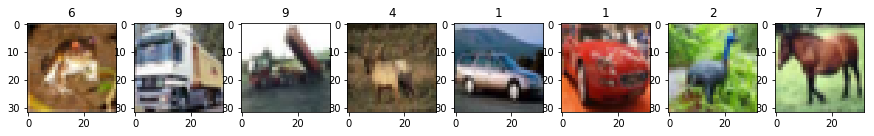

In [0]:
plt.figure(figsize=(15, 4))
for i in range(0, 8):
    plt.subplot(1, 8, i+1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i, 0])

## ক্লাসের নাম সহ ২৫টা ছবি দেখি 

আরো ভালো করে দেখতে গেলে আমাদেরকে সেই ১০টা ক্লাসের নাম আগে থেকে দিয়ে দিতে হবে।

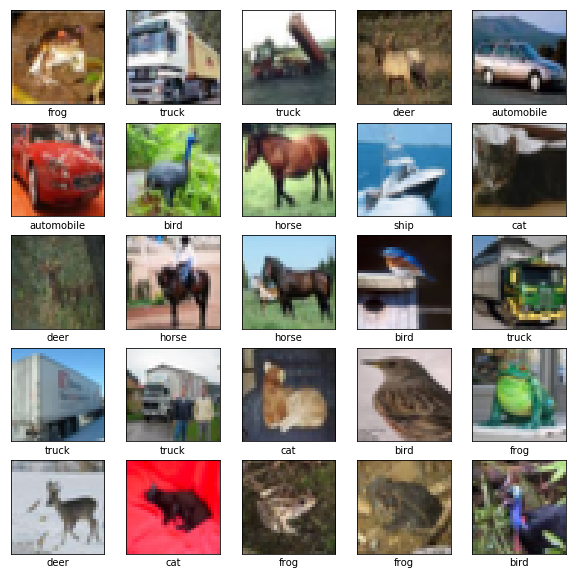

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # সিফারের লেবেলগুলো যেহেতু অ্যারে, সেকারণে আমাদের 
    # বাড়তি ইনডেক্স দরকার পড়ছে
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### আমরা এখানে একটা কনভলিউশনাল বেজ তৈরি করি

এর আগেও আমরা দেখেছি একটা কনভলিউশনাল নিউরাল নেটওয়ার্কে দুই ধরনের লেয়ার থাকে। Conv2D এবং MaxPooling2D লেয়ারের কথা বলছি। এখানে ইনপুট হিসেবে আমাদের কনভলিউশনাল নিউরাল নেটওয়ার্ক টেন্সর থেকে তার ‘শেপ’ (৩২,৩২,৩) নিয়ে আসে। আমাদের এখানে ছবির উচ্চতা, ছবির দৈর্ঘ্য, (পিক্সেলে) এবং কালার চ্যানেল এই তিনটা ইনপুট হলেই চলছে এখানে। এই মুহূর্তে আমরা ব্যাচ সাইজ নিয়ে চিন্তা করছি না। এর আগে আমরা যেহেতু কোন কালার ছবি নিয়ে কাজ করিনি সে কারণে আমরা এখানে তিনটা কালার চ্যানেল বলছি - যেটাকে আমরা বলি লাল, সবুজ, নীল, (R,G,B) সে কারণেই তিনটা ডাইমেনশন। আমাদের ছবির উচ্চতা ৩২ পিক্সেল, ছবির দৈর্ঘ্য ৩২ পিক্সেল, আর তিন রঙের কালার চ্যানেলের জন্য ৩। এই জিনিসটাকে আমরা আর্গুমেন্ট হিসেবে পাঠিয়ে দিচ্ছি ‘input_shape’ অংশে আমাদের প্রথম লেয়ারে। 


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

## ‘ডেন্স’ লেয়ারকে যোগ করি সবচেয়ে উপরে

আমাদের মডেলকে পরিপূর্ণ ধারনায় আনার জন্য আগের কনভলিউশনাল বেজের আউটপুট টেন্সর থেকে ডেন্স লেয়ারের ইনপুটে ঢুকিয়ে দেবো। যেহেতু আমাদের ডেন্স লেয়ার ইনপুট হিসেবে ১ ডাইমেনশন নেয়, সেখানে আমাদের কনভলিউশনাল বেজের আউটপুট হচ্ছে ৩ ডি টেন্সর। সে কারণে আমাদের ৩ ডি টেন্সর এর আউটপুটকে ১ ডাইমেনশনে ‘ফ্ল্যাটেন’ করে নেব। এরপর আমরা কয়েকটা ডেন্স লেয়ার যোগ করতে পারি। যেহেতু সিফারের দশটা আউটপুট ক্লাস, সেকারণে সর্বশেষ ডেন্স লেয়ার তৈরি হবে ১০টা আউটপুট দিয়ে যেখানে ‘সফটম্যাক্স অ্যাক্টিভেশন’ ফাংশন আমরা ব্যবহার করব। 


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### মডেলের একটা সামারি দেখি

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
# আগের সব ট্রেনিং এর লগ ফেলে দিচ্ছি 
!rm -rf ./logs/ 

## কেরাসের Model.fit() ব্যবহার করছি টেন্সরবোর্ডের সাথে

এখন আসি টেন্সরবোর্ডের ব্যাপারে। মডেল ফিটের সাথে tf.keras.callback.TensorBoard কলব্যাককে বলা হচ্ছে কোথায় কিভাবে লগগুলো রাখবে। আগে যা শিখেছি তার সব ঠিক থাকবে তবে আমরা যখন মডেলকে কম্পাইল করে সেটাকে ফিট করানোর চেষ্টা করব তখনই আমরা টেন্সরবোর্ডকে ব্যবহার করব। আমরা যেহেতু সবকিছুতেই কেরাস ব্যবহার করছি সে কারণে এটাকে টেন্সরবোর্ড ‘কলব্যাক’ অথবা ‘কেরাস কলব্যাক’ বলতে পারি। আবারো বলছি - মডেল ট্রেনিং এর সময় কেরাসের মডেল ফিট ‘টেন্সরবোর্ড কলব্যাক’কে বলবে কোথায় তার লগগুলো তৈরি এবং স্টোর করে রাখবে।





ডিফল্ট সেটিং হিসেবে প্রতিটা ইপকের হিস্টোগ্রাম কম্পিউটেশন বন্ধ করা থাকলেও সেটাকে চালু করে নেব আমরা (histogram_freq=1)। লগ এর জন্য যে ডাইরেক্টরি থাকছে তার ভেতরে আমরা প্রতিটা ট্রেনিং রানকে আলাদাভাবে মেজারমেন্ট করার জন্য নতুন নতুন সাব ডাইরেক্টরি তৈরি করতে বলবো টাইমস্ট্যম্পিং সহ। এতে যতবারই আমরা ট্রেনিং করাই না কেন সে আলাদা আলাদা করে প্রতিটা ডাটা নতুন সাব ডাইরেক্টরি হিসেবে রাখবে দিনক্ষণ যোগ করে। আগের ডেটা ওভাররাইট করার সুযোগ দিচ্ছি না আমরা।

In [0]:
# কমেন্টে থাকা কোড নিয়ে টেস্ট করুন 
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
log_dir="logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopper = EarlyStopping(monitor='val_accuracy', patience=10)
tensorboard = TensorBoard(log_dir, histogram_freq=1)
# এখানে আমরা মডেল চেকপয়েন্টারে স্টোর হচ্ছে hdf5 ফরম্যাটে, 
# সামনে আমরা দেখবো মডেলকে যখন স্টোর করে রাখবো
checkpointer = ModelCheckpoint(log_dir+'weights_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.2f}.hdf5',
                               monitor='val_acc')

# model.fit(x=train_images, 
#         y=train_labels, 
#         epochs=5, 
#         validation_data=(test_images, test_labels), 
#         callbacks=[tensorboard_callback])

model.fit(train_images, train_labels,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stopper,
                     tensorboard,
                     checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
  128/45000 [..............................] - ETA: 23:00 - loss: 2.2876 - accuracy: 0.1250WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.120824). Check your callbacks.


45000/45000 [==============================] - 9s 209us/sample - loss: 1.7029 - accuracy: 0.3754 - val_loss: 1.4727 - val_accuracy: 0.4714
Epoch 2/10
45000/45000 [==============================] - 5s 115us/sample - loss: 1.3515 - accuracy: 0.5164 - val_loss: 1.3490 - val_accuracy: 0.5104
Epoch 3/10
45000/45000 [==============================] - 5s 116us/sample - loss: 1.2073 - accuracy: 0.5747 - val_loss: 1.1627 - val_accuracy: 0.5960
Epoch 4/10
45000/45000 [==============================] - 5s 118us/sample - loss: 1.1147 - accuracy: 0.6089 - val_loss: 1.0986 - val_accuracy: 0.6180
Epoch 5/10
45000/45000 [==============================] - 5s 119us/sample - loss: 1.0344 - accuracy: 0.6406 - val_loss: 1.0274 - val_accuracy: 0.6458
Epoch 6/10
45000/45000 [==============================] - 5s 117us/sample - loss: 0.9848 - accuracy: 0.6583 - val_loss: 0.9961 - val_accuracy: 0.6552
Epoch 7/10
45000/45000 [==============================] - 5s 116us/sample - loss: 0.9338 - accuracy: 0.6748 - v

In [0]:
## আমরা একটু দেখে নেই কি আছে সেই ডিরেক্টরিতে?
import os
sorted(os.listdir(log_dir))

['train',
 'validation',
 'weights_epoch_01_val_accuracy_0.47.hdf5',
 'weights_epoch_02_val_accuracy_0.51.hdf5',
 'weights_epoch_03_val_accuracy_0.60.hdf5',
 'weights_epoch_04_val_accuracy_0.62.hdf5',
 'weights_epoch_05_val_accuracy_0.65.hdf5',
 'weights_epoch_06_val_accuracy_0.66.hdf5',
 'weights_epoch_07_val_accuracy_0.67.hdf5',
 'weights_epoch_08_val_accuracy_0.68.hdf5',
 'weights_epoch_09_val_accuracy_0.68.hdf5',
 'weights_epoch_10_val_accuracy_0.69.hdf5']

## চালু করি আমাদের টেন্সরবোর্ডকে

টেন্সরবোর্ডকে কমান্ডলাইন অথবা নোটবুকের ভেতর থেকেও চালু করা যাবে। এক্ষেত্রে দুটো ইন্টারফেসই দেখতে একই রকম। নোটবুক এর ভেতর থেকে চালানোর জন্য টেন্সরবোর্ড ম্যাজিক লাইন `%tensorboard` কমান্ড ব্যবহার করতে হবে। কমান্ডলাইনে "%" বাদ দিয়ে চালাতে হবে। 

In [0]:
%tensorboard --logdir logs/fit

<img src="https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/assets/tensorboad1.PNG"> চিত্রঃ কনভল্যুশনাল নিউরাল নেটওয়ার্ক মডেলের অ্যাক্যুরেসি এবং লস 

## টেন্সরবোর্ড ড্যাশবোর্ড

শুুুুুুরুতেই আমাদের ;স্কেলার’ ড্যাশবোর্ড। এখানে আমরা দেখবো কীভাবে লস এবং ম্যাট্রিক্স পাল্টে যায় প্রতিটা ইপকে। এছাড়াও আমরা মডেলের ,ট্রেনিং স্পিড, লার্নিং রেট এবং অন্যান্য স্কেলার ভ্যালুকে ট্র্যাক করতে পারবো। 

এর পরে আসছে ‘গ্রাফ’ ড্যাশবোর্ড।  আমার পছন্দের একটা ড্যাশবোর্ড যার মাধ্যমে আমাদের মডেলকে পুরোপুরি ভিজুয়ালাইজ করা যায়। সবচেয়ে মজার কথা হচ্ছে কেরাস এপিআই এর বিভিন্ন লেয়ারের গ্রাফ এখানে দেখা যায় - যেটা আমরা মডেল সামারি দিয়ে বুঝতে পারি। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/model-tfboard.PNG"> চিত্রঃ মডেলের একটা গ্রাফ, ভুল হচ্ছে কিনা বোঝার জন্য

আমাদের ‘ডিস্ট্রিবিউশন’ এবং ‘হিস্টোগ্রাম’ ড্যাশবোর্ডগুলো দিয়ে টেন্সরগুলোর ডিস্ট্রিবিউশন দেখা যায় সময় ধরে। এটা অনেক সময় ‘ওয়েট’ এবং ‘বায়াস’কে ভিজুয়ালাইজ করতে কাজে লাগে। সময়ের সাথে সাথে কিভাবে এগুলো পাল্টাচ্ছে সেগুলো দেখা যায় এখানে। 

পাশাপাশি দরকারি টেন্সরবোর্ডের প্লাগিনগুলো স্বয়ংক্রিয়ভাবে চালু হয়ে যায় যখন আমরা বিভিন্ন ডাটাগুলোকে লগ করা শুরু করি। এর পাশাপাশি টেন্সরবোর্ডের ‘কলব্যাক’ আমাদের ইমেজ এবং এম্বেডিং গুলোকে লগ করে রাখে। আমরা টেন্সরবোর্ডের ডানদিকের ‘ইন্যাক্টিভ’ ড্রপডাউন মেনু থেকে বাকিগুলোকে দেখতে পারবো। 